In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import copy

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

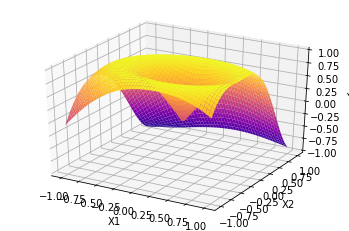

In [3]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [4]:
xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

## Find best split with gradient descent -- scale error around break point with gaussian

In [5]:
optim = tnn.Adam()
linear = tnn.LinearLayer(2,1,optimizer=optim)

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

gaussian = tnn.Gaussian()

In [6]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    lout = linear.forward(xx)
    err_scaler = gaussian.forward(lout) ### ??? same as sigmoid based 
    
    mask0 = lout>0 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    yout = y0 + y1

    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
    dx = linear.backward(dy*err_scaler)
    
    linear.update()
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5639648664243325


100 Error =  0.09007647521860238


200 Error =  0.08653440410283587


300 Error =  0.08473210514597052


400 Error =  0.0830886539607556


500 Error =  0.08085851562791108


600 Error =  0.08019844375251184


700 Error =  0.0801947548635124


800 Error =  0.0794500601787823


900 Error =  0.07885509388666938


1000 Error =  0.07862452347395277


1100 Error =  0.07832545186883429


1200 Error =  0.0780674995083225


1300 Error =  0.07782597977650436


1400 Error =  0.07778302686440672


1500 Error =  0.07759589674607377


1600 Error =  0.07759428655547604


1700 Error =  0.07826331962849072


1800 Error =  0.07826332192364363


1900 Error =  0.07826329450175185


2000 Error =  0.07787286963087763


2100 Error =  0.07835571432156471


2200 Error =  0.07794788997877157


2300 Error =  0.07759385260571389


2400 Error =  0.07798417168771112


2500 Error =  0.07798428924921039


2600 Error =  0.07822857306033316


2700 Error =  0.07787719109079787


2800 Erro

TclError: invalid command name "pyimage16"

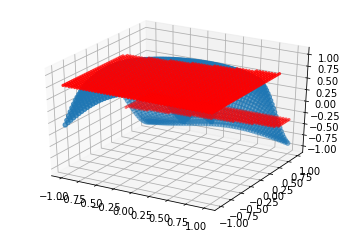

In [7]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
plt.show()

In [8]:
error, linear.weights, linear.bias

(0.07835501691457865, array([[ 0.41100434],
        [-2.83215632]]), array([1.49819734]))

In [9]:
np.count_nonzero(mask0), np.count_nonzero(mask1)

(1898, 602)

## Sigmoid based,, it has gaussian gradient scaling

In [10]:
optim = tnn.Adam()
linear = tnn.LinearLayer(2,1,optimizer=optim)
sigmoid = tnn.Sigmoid()

c0 = np.array([0.])
c1 = np.array([0.])

c0opt = optim.set_parameter(c0)
c1opt = optim.set_parameter(c1)

In [11]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    lout = sigmoid.forward(linear.forward(xx))
    
    mask0 = lout>0.5 ## equivalent to double relu splits
    mask1 = ~mask0    
       
    y0 = c0*mask0
    y1 = c1*mask1
    yout = y0 + y1
    
    dy = yout - yy
    dy0 = dy
    dy1 = dy
    
    dc0 = dy0*(mask0)
    dc1 = dy1*(mask1)
    
    dx = linear.backward(sigmoid.backward(dy)/0.25)
    
    linear.update()
    delc0 = c0opt.compute_gradient(np.mean(dc0,axis=0))
    c0 -= delc0
    delc1 = c1opt.compute_gradient(np.mean(dc1,axis=0))
    c1 -= delc1
    
    dy = yout - yy
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear() 
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.5639648664243325


100 Error =  0.2719155095434834


200 Error =  0.1485229240278957


300 Error =  0.1434719865898419


400 Error =  0.1340664434789725


500 Error =  0.12168403771691594


600 Error =  0.10945276764842565


700 Error =  0.09961394730663246


800 Error =  0.09344912239546502


900 Error =  0.08929701989766986


1000 Error =  0.08715823664598633


1100 Error =  0.08516218364564422


1200 Error =  0.08383249869757402


1300 Error =  0.0828766634330291


1400 Error =  0.08239310210563108


1500 Error =  0.0813688936242824


1600 Error =  0.0809070056136536


1700 Error =  0.08003271270765788


1800 Error =  0.08019413373921995


1900 Error =  0.07992515244353812


2000 Error =  0.07944095640650076


2100 Error =  0.07973374170972565


2200 Error =  0.07931629245903596


2300 Error =  0.079497901401851


2400 Error =  0.07913924826936959


2500 Error =  0.07902077939716841


2600 Error =  0.07902055098421251


2700 Error =  0.07826437584853843


2800 Error =  

TclError: invalid command name "pyimage34"

In [12]:
linear.weights, linear.bias

(array([[ 0.98205405],
        [-6.86656131]]), array([3.64509567]))